In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [2]:
cwd= pathlib.Path.cwd()

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# cwd = pathlib.Path("/content/gdrive/MyDrive/telco_customer_churn_prediction/")
# cwd

In [4]:
df= pd.read_csv(cwd / "Telco-Customer-Churn.csv")

In [5]:
df.shape

(7032, 21)

In [6]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
#Unique values in object types (excluding customerID)
for col in df.drop(columns="customerID").select_dtypes(include="object").columns: print(f"{col}: {len(df[col].unique())}")

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [8]:
df= df.drop(columns="customerID")

In [9]:
X= df.drop(columns="Churn")
y= df["Churn"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [11]:
X_obj= X.select_dtypes(include="object")
X_num = X.select_dtypes(exclude="object")

In [12]:
X_obj_dummies= pd.get_dummies(data=X_obj,drop_first=True)

In [13]:
X_obj_dummies.shape

(7032, 26)

In [14]:
X_obj_dummies.head().transpose()

,0,1,2,3,4
gender_Male,0,1,1,1,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0
MultipleLines_Yes,0,0,0,0,0
InternetService_Fiber optic,0,0,0,0,1
InternetService_No,0,0,0,0,0
OnlineSecurity_No internet service,0,0,0,0,0
OnlineSecurity_Yes,0,1,1,1,0


In [15]:
X_d = pd.concat([X_num,X_obj_dummies],axis=1)
X_d.shape

(7032, 30)

In [16]:
y=y.map({"No":0,"Yes":1})

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=555)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [20]:
pipe= Pipeline(steps=[('est',LogisticRegression())])

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
params_grid = [{
                'est':[LogisticRegression(penalty="elasticnet", solver="saga",class_weight="balanced", max_iter=1e4)],
                'est__C':[0.001,0.01,0.1,0.5,1,2,4,5],
                'est__l1_ratio':[0.1, 0.25, 0.5, 0.75, 1],
                },
               {
                'est':[KNeighborsClassifier()],
                'est__n_neighbors': [1, 3, 5, 7, 9, 11]
                }
              ]


In [24]:
grid = GridSearchCV(estimator=pipe,
                    param_grid=params_grid,
                    scoring='accuracy',
                    cv=3,
                    verbose=2,
                    n_jobs=2)

In [25]:
scaled_X_train[0:5]

array([[ 2.28223778, -0.75442721,  0.47399864, -0.54972689, -0.99911151,
        -0.96660184, -0.65728721,  0.33118926, -0.33118926, -0.8573448 ,
         1.14003199, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
         1.37281295, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165, -0.78983876, -0.52544165, -0.79787323, -0.51357663,
        -0.56359453, -1.2001446 , -0.53149764,  1.41534569, -0.54276283],
       [-0.43816644,  0.95573809,  0.01868573,  0.54215157, -0.99911151,
         1.03455214,  1.52140493,  0.33118926, -0.33118926,  1.16639187,
        -0.87716837, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
        -0.72843136, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165,  1.26608119, -0.52544165, -0.79787323,  1.94712911,
        -0.56359453, -1.2001446 , -0.53149764, -0.70654117, -0.54276283],
       [-0.43816644,  1.44435675, -0.29152746,  0.69106922, -0.99911151,
         1.03455214, -0.65728721,  0.33118926, -0

In [26]:
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 46 candidates, totalling 138 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, total=   0.2s
[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, total=   0.1s
[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, tot

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    6.0s


[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.5, total=   0.2s
[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.5, total=   0.2s
[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.75, total=   0.1s
[CV] est=LogisticRegression(class_weight='balanced', max_iter=10000.0,
                   penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.7

[Parallel(n_jobs=2)]: Done 138 out of 138 | elapsed:   40.4s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('est', LogisticRegression())]),
             n_jobs=2,
             param_grid=[{'est': [LogisticRegression(class_weight='balanced',
                                                     max_iter=10000.0,
                                                     penalty='elasticnet',
                                                     solver='saga')],
                          'est__C': [0.001, 0.01, 0.1, 0.5, 1, 2, 4, 5],
                          'est__l1_ratio': [0.1, 0.25, 0.5, 0.75, 1]},
                         {'est': [KNeighborsClassifier(n_neighbors=11)],
                          'est__n_neighbors': [1, 3, 5, 7, 9, 11]}],
             scoring='accuracy', verbose=2)

In [27]:
grid.best_params_

{'est': KNeighborsClassifier(n_neighbors=11), 'est__n_neighbors': 11}

In [28]:
grid_cv_results = pd.DataFrame(grid.cv_results_)

In [29]:
grid_cv_results.sort_values(by="mean_test_score",ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est,param_est__C,param_est__l1_ratio,param_est__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
45,0.021693,0.000704,0.418126,0.009604,KNeighborsClassifier(n_neighbors=11),NaN,NaN,11,"{'est': KNeighborsClassifier(n_neighbors=11), ...",0.769600,0.786133,0.758400,0.771378,0.011392,1
44,0.019752,0.000446,0.420467,0.007751,KNeighborsClassifier(n_neighbors=11),NaN,NaN,9,"{'est': KNeighborsClassifier(n_neighbors=11), ...",0.757867,0.783467,0.753067,0.764800,0.013344,2
43,0.023548,0.003786,0.433064,0.009911,KNeighborsClassifier(n_neighbors=11),NaN,NaN,7,"{'est': KNeighborsClassifier(n_neighbors=11), ...",0.754667,0.765867,0.754133,0.758222,0.005410,3
42,0.022285,0.001239,0.403309,0.006192,KNeighborsClassifier(n_neighbors=11),NaN,NaN,5,"{'est': KNeighborsClassifier(n_neighbors=11), ...",0.754667,0.763200,0.750400,0.756089,0.005321,4
10,0.152858,0.007757,0.003307,0.000685,"LogisticRegression(class_weight='balanced', ma...",0.1,0.1,NaN,{'est': LogisticRegression(class_weight='balan...,0.754133,0.752533,0.739200,0.748622,0.006694,5


In [30]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [31]:
y_pred=grid.predict(scaled_X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [33]:
y_test

1857    0
2676    0
5319    0
414     0
312     0
       ..
6169    0
1815    0
6115    0
6340    0
4397    1
Name: Churn, Length: 1407, dtype: int64

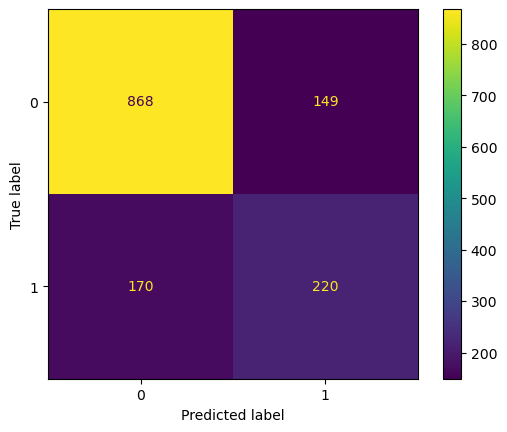

In [34]:
plot_confusion_matrix(grid.best_estimator_,scaled_X_test,y_test.to_numpy().reshape(-1,1))

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1017
           1       0.60      0.56      0.58       390

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

